In [46]:
import pandas as pd
import numpy as np
import datetime as datetime
from pandas import read_csv
crimes = read_csv('Chicago_Crimes_2012_to_2017.csv')

In [2]:
print(type(crimes))

<class 'pandas.core.frame.DataFrame'>


In [3]:
crimes = crimes.iloc[:, 3: ]
crimes.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,05-03-2016 23:40,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05-10-2016 15:56,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,05-03-2016 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05-10-2016 15:56,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,05-03-2016 23:31,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05-10-2016 15:56,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,05-03-2016 22:10,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05-10-2016 15:56,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,05-03-2016 22:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,6,1139890.0,1901675.0,2016,05-10-2016 15:56,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [4]:
# convert dates to pandas datetime format
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p',infer_datetime_format=True)
# setting the index to be the date will help us a lot later on
crimes.index = pd.DatetimeIndex(crimes.Date)

In [5]:
print(crimes.shape)
print(crimes.head())

(1048575, 20)
                                   Date                Block IUCR  \
Date                                                                
2016-05-03 23:40:00 2016-05-03 23:40:00   013XX S SAWYER AVE  486   
2016-05-03 21:40:00 2016-05-03 21:40:00   061XX S DREXEL AVE  486   
2016-05-03 23:31:00 2016-05-03 23:31:00  053XX W CHICAGO AVE  470   
2016-05-03 22:10:00 2016-05-03 22:10:00    049XX W FULTON ST  460   
2016-05-03 22:00:00 2016-05-03 22:00:00    003XX N LOTUS AVE  820   

                               Primary Type              Description  \
Date                                                                   
2016-05-03 23:40:00                 BATTERY  DOMESTIC BATTERY SIMPLE   
2016-05-03 21:40:00                 BATTERY  DOMESTIC BATTERY SIMPLE   
2016-05-03 23:31:00  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT   
2016-05-03 22:10:00                 BATTERY                   SIMPLE   
2016-05-03 22:00:00                   THEFT           $500 AND UNDER  

In [6]:
s = crimes[['Primary Type']]

In [7]:
s.head()

,Primary Type
Date,
2016-05-03 23:40:00,BATTERY
2016-05-03 21:40:00,BATTERY
2016-05-03 23:31:00,PUBLIC PEACE VIOLATION
2016-05-03 22:10:00,BATTERY
2016-05-03 22:00:00,THEFT


In [8]:
crime_count = pd.DataFrame(s.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())

In [9]:
crime_count.head()

,Primary Type,counts
0,THEFT,236724
1,BATTERY,188826
2,NARCOTICS,110781
3,CRIMINAL DAMAGE,109031
4,ASSAULT,64049


In [10]:
crime_count.shape

(33, 2)

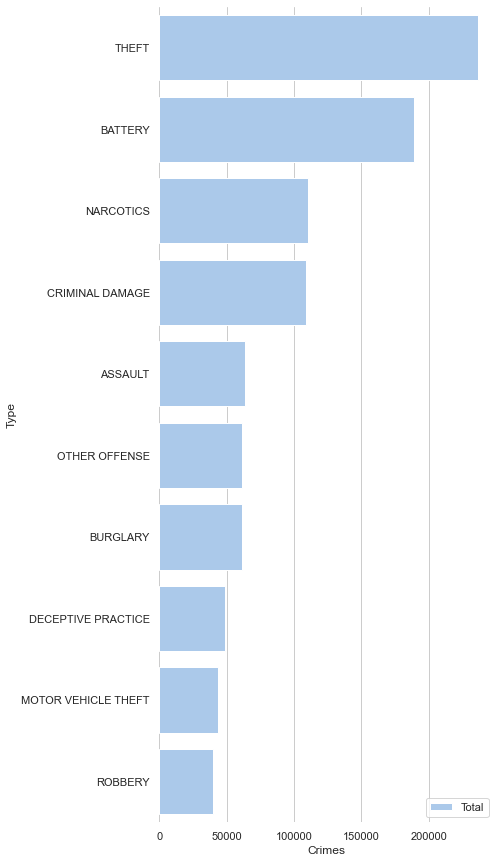

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="counts", y="Primary Type", data=crime_count.iloc[:10, :],
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",
       xlabel="Crimes")
sns.despine(left=True, bottom=True)

# Add a legend and informative axis label
plt.show()

## Arrests

In [12]:
crimes_2012 = crimes.loc['2012']
crimes_2013 = crimes.loc['2013']
crimes_2014 = crimes.loc['2014']
crimes_2015 = crimes.loc['2015']
crimes_2016 = crimes.loc['2016']
crimes_2017 = crimes.loc['2017']

In [13]:
## Yearly crimes
arrest_yearly = crimes[crimes['Arrest'] == True]['Arrest']

In [14]:
print(arrest_yearly.head())

Date
2016-05-03 23:40:00    True
2016-05-03 21:44:00    True
2016-05-03 23:11:00    True
2016-05-04 11:15:00    True
2016-05-04 11:30:00    True
Name: Arrest, dtype: bool


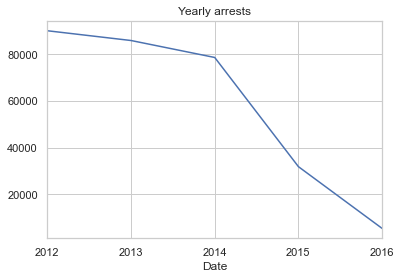

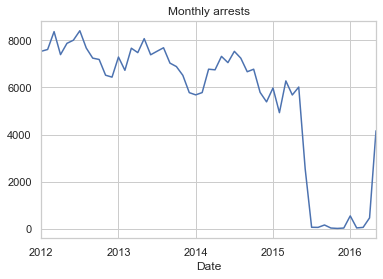

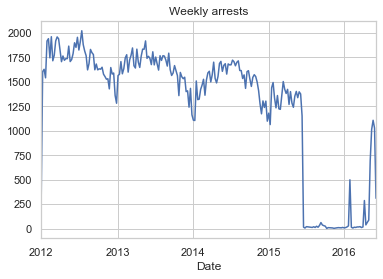

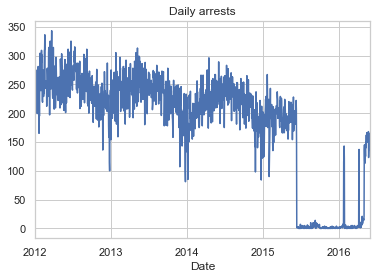

In [15]:
plt.subplot()
# yearly arrest
arrest_yearly.resample('A').sum().plot()
plt.title('Yearly arrests')
plt.show()
# Monthly arrest
arrest_yearly.resample('M').sum().plot()
plt.title('Monthly arrests')
plt.show()
# Weekly arrest
arrest_yearly.resample('W').sum().plot()
plt.title('Weekly arrests')
plt.show()
# daily arrest
arrest_yearly.resample('D').sum().plot()
plt.title('Daily arrests')
plt.show()
plt.show()

## Domestic violence

In [16]:
domestic_yearly = crimes[crimes['Domestic'] == True]['Domestic']
print(domestic_yearly.head())

Date
2016-05-03 23:40:00    True
2016-05-03 21:40:00    True
2016-05-03 22:00:00    True
2016-05-03 22:30:00    True
2016-05-03 23:11:00    True
Name: Domestic, dtype: bool


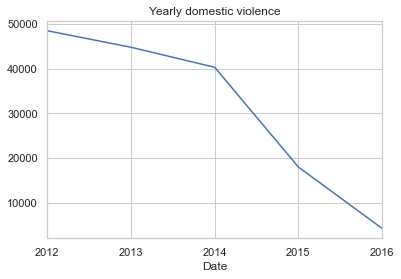

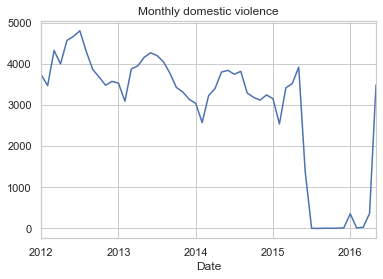

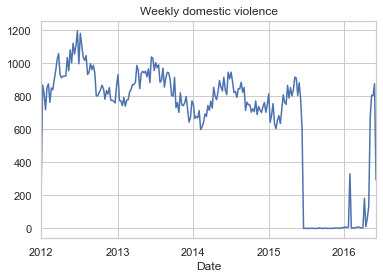

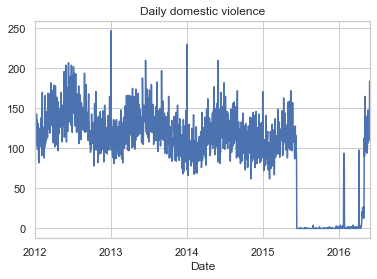

In [17]:
plt.subplot()
# yearly domestic violence
domestic_yearly.resample('A').sum().plot()
plt.title('Yearly domestic violence')
plt.show()
# Monthly domestic violence
domestic_yearly.resample('M').sum().plot()
plt.title('Monthly domestic violence')
plt.show()
# Weekly domestic violence
domestic_yearly.resample('W').sum().plot()
plt.title('Weekly domestic violence')
plt.show()
# daily domestic violence
domestic_yearly.resample('D').sum().plot()
plt.title('Daily domestic violence')
plt.show()
plt.show()

In [18]:
crimes.drop(['IUCR','Updated On', 'FBI Code', 'Beat','Ward', 'Location'], inplace=True, axis=1)

In [19]:
crimes.head(3)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
Date,,,,,,,,,,,,,,
2016-05-03 23:40:00,2016-05-03 23:40:00,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,29.0,1154907.0,1893681.0,2016,41.864073,-87.706819
2016-05-03 21:40:00,2016-05-03 21:40:00,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,3.0,42.0,1183066.0,1864330.0,2016,41.782922,-87.604363
2016-05-03 23:31:00,2016-05-03 23:31:00,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,15.0,25.0,1140789.0,1904819.0,2016,41.894908,-87.758372


In [20]:
crimes.shape

(1048575, 14)

In [21]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2016-05-03 23:40:00 to 2015-06-13 22:00:00
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Date                  1048575 non-null  datetime64[ns]
 1   Block                 1048575 non-null  object        
 2   Primary Type          1048575 non-null  object        
 3   Description           1048575 non-null  object        
 4   Location Description  1047927 non-null  object        
 5   Arrest                1048575 non-null  bool          
 6   Domestic              1048575 non-null  bool          
 7   District              1048574 non-null  float64       
 8   Community Area        1048535 non-null  float64       
 9   X Coordinate          1039870 non-null  float64       
 10  Y Coordinate          1039870 non-null  float64       
 11  Year                  1048575 non-null  int64         
 12  Latitude 

In [22]:
loc_to_change  = list(crimes['Location Description'].value_counts()[20:].index)
desc_to_change = list(crimes['Description'].value_counts()[20:].index)

crimes.loc[crimes['Location Description'].isin(loc_to_change) , crimes.columns=='Location Description'] = 'OTHER'
crimes.loc[crimes['Description'].isin(desc_to_change) , crimes.columns=='Description'] = 'OTHER'

In [23]:
# we convert those 3 columns into 'Categorical' types -- works like 'factor' in R
crimes['Primary Type']         = pd.Categorical(crimes['Primary Type'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])
crimes['Description']          = pd.Categorical(crimes['Description'])

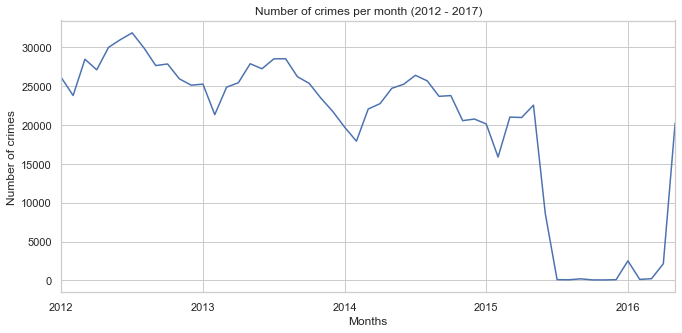

In [24]:
plt.figure(figsize=(11,5))
crimes.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2012 - 2017)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

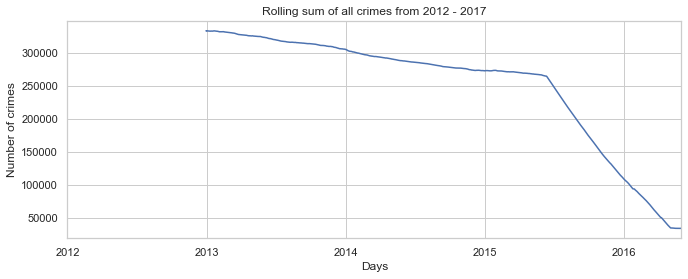

In [25]:
plt.figure(figsize=(11,4))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2012 - 2017')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

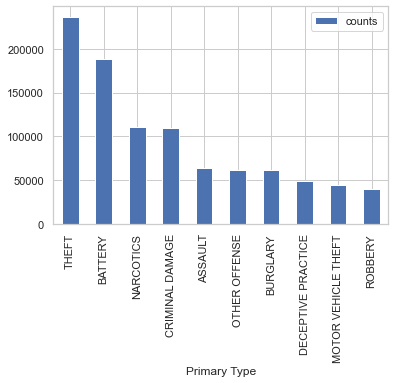

In [26]:
# Plot top 10 crimes on a barplot
crime_count[:10].plot(x='Primary Type',kind='bar')

## Crime Location

In [27]:
# Group by Crime Location and calculate count
crime_location = pd.DataFrame(crimes.groupby('Location Description').size().sort_values(ascending=False).rename('Count').reset_index())
crime_location.head()

,Location Description,Count
0,STREET,237160
1,RESIDENCE,165957
2,OTHER,143764
3,APARTMENT,132242
4,SIDEWALK,122176


In [28]:
crime_location.shape

(20, 2)

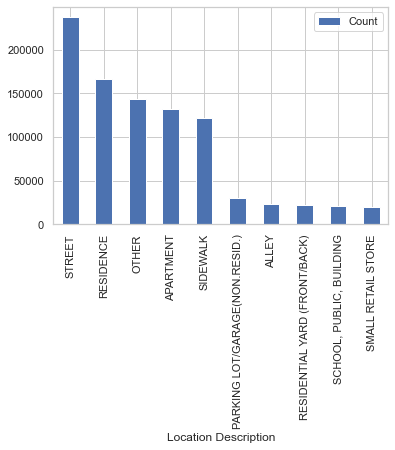

In [29]:
# Plot top 10 crime location on a barplot
crime_location[:10].plot(x='Location Description',y='Count',kind='bar')

## What crimes are being committed in Chicago?

In [38]:
crimes['Primary Type'].value_counts()/crimes.shape[0]

THEFT                                0.225758
BATTERY                              0.180079
NARCOTICS                            0.105649
CRIMINAL DAMAGE                      0.103980
ASSAULT                              0.061082
OTHER OFFENSE                        0.058852
BURGLARY                             0.058611
DECEPTIVE PRACTICE                   0.046441
MOTOR VEHICLE THEFT                  0.041944
ROBBERY                              0.037896
CRIMINAL TRESPASS                    0.026248
WEAPONS VIOLATION                    0.011551
PUBLIC PEACE VIOLATION               0.009835
OFFENSE INVOLVING CHILDREN           0.007488
PROSTITUTION                         0.006031
INTERFERENCE WITH PUBLIC OFFICER     0.004365
CRIM SEXUAL ASSAULT                  0.004243
SEX OFFENSE                          0.003176
GAMBLING                             0.001767
LIQUOR LAW VIOLATION                 0.001519
ARSON                                0.001391
KIDNAPPING                        

## Murder Year-on-Year

In [30]:
homicide = crimes[crimes['Primary Type'] == 'HOMICIDE'].copy()

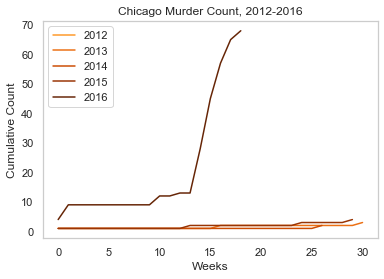

In [31]:
bins = homicide[['Description', 'Year', 'Date']].copy()
title = 'Chicago Murder Count, 2012-2016'
def plot_crime_by_Year(bins, title):
    colors = ['#fe9929','#ec7014','#cc4c02','#993404','#662506']

    i = 0
    bins = bins[bins.Year < 2017]
    years = bins.groupby('Year')
    for a, b in years:
        b.index = b.Date
        aYear = b.resample('W').count()
        aYear.index = range(aYear.shape[0])
        plt.plot(aYear.Description.cumsum(), color=colors[i], label = a)
        i += 1
    plt.grid()
    plt.legend(loc = 'upper left')
    plt.title(title)
    plt.xlabel('Weeks')
    plt.ylabel('Cumulative Count')

plot_crime_by_Year(bins, title)

It's clear that more people have been murdered in Chicago in 2016 than in the previous years, and consistently so throughout the year. There wasn't a sudden jump in any one week

## Where Have the Murders Taken Place?

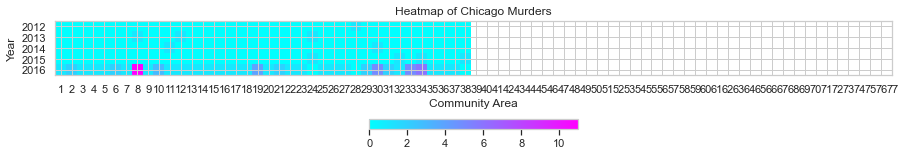

In [41]:
homicide_for_heatmap = homicide[homicide.Year < 2017].copy()

def plot_heatmap(data_row, data_column, title):
    table = pd.crosstab(data_row, data_column)
    fig, ax = plt.subplots(1, 1, figsize = (15, 8))
    map = ax.imshow(table,
                   cmap='cool',
                   interpolation='nearest')
    plt.xticks(range(77), range(1,78))
    plt.yticks(range(5), range(2012, 2017))
    ax.set_title(title)
    ax.set_xlabel('Community Area')
    ax.set_ylabel('Year')
    plt.colorbar(map,
             orientation= 'horizontal',
             shrink = 0.25,
            pad = 0.10);

plot_heatmap(homicide['Year'], homicide['Community Area'], 'Heatmap of Chicago Murders')